# This notebook produces the sentiment bar charts 


This notebook will perform the following steps:

1. 


In [1]:
import warnings
import numpy as np

warnings.filterwarnings('ignore')

import os.path
import sqlite3
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from process_text import clean_up_text
from process_text import preprocess
from process_text import string_cohesion
from sklearn.feature_extraction.text import TfidfVectorizer

car_company = "Tesla"

conn = sqlite3.connect('keyword_based_database.db')

q_ford='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
LIMIT 10000;
'''

q_toyota='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
LIMIT 10000;
'''


q_mercedes='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
LIMIT 10000;
'''

q_bmw='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
LIMIT 10000;
'''

q_porche='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
LIMIT 10000;
'''

q_tesla='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) LIKE '%model%'
AND LOWER(tweet_text) NOT LIKE '%elon%'
AND LOWER(tweet_text) NOT LIKE '%musk%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND LOWER(tweet_text) NOT LIKE '%stock%'
AND LOWER(tweet_text) NOT LIKE '%production rate%'
AND LOWER(tweet_text) NOT LIKE '%money model%'
AND LOWER(tweet_text) NOT LIKE '%industry%'
AND LOWER(tweet_text) NOT LIKE '%net loss%'
AND LOWER(tweet_text) NOT LIKE '%loss%'
AND LOWER(tweet_text) NOT LIKE '%profit%'
AND LOWER(tweet_text) NOT LIKE '%atari%'
AND LOWER(tweet_text) NOT LIKE '%financial%'
AND LOWER(tweet_text) NOT LIKE '%earn%'
AND LOWER(tweet_text) NOT LIKE '%quarterly%'
AND LOWER(tweet_text) NOT LIKE '%record%'
AND LOWER(tweet_text) NOT LIKE '%market%'
AND LOWER(tweet_text) NOT LIKE '%outsell%'
AND LOWER(tweet_text) NOT LIKE '%produce%'
AND LOWER(tweet_text) NOT LIKE 'second-quarter'
AND LOWER(tweet_text) NOT LIKE 'invest'
LIMIT 10000;
'''

if(car_company=="Toyota"):
    q = q_toyota
elif(car_company=="Ford"):
    q= q_ford
elif(car_company=="Mercedes"):
    q=q_mercedes
elif(car_company=="BMW"):
    q=q_bmw
elif(car_company=="Porche"):
    q=q_porche
elif(car_company=="Tesla"):
    q=q_tesla


df = pd.read_sql_query(q,conn)

[nltk_data] Downloading package wordnet to /home/javier/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/javier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/javier/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Some simple data exploration on the filtered tweets, histograms of the tweet lengths

---------------------------------------------------------
Column names: 
 ['tweet_id_text', 'tweet_hashtag', 'tweet_text', 'created_at', 'geo_lat', 'geo_long', 'user_id_text'] 

The number of tweets:  7443 

---------------------------------------------------------
Sample Tweets: 

0     I just entered the Win Thomas' Tesla Sweepstak...
1     Software Engineer, Devops: Software Engineer, ...
2     RT @AlguireTim: Camping with Tesla Model 3\nWe...
3     @Latrilife @EthicsGradient 🤣🤣🤣\nTesla delivers...
4     RT @LikeTeslaKim: Wow, didn’t see this coming!...
5     RT @EcoHeliGuy: @InsideEVs is reporting an est...
6     RT @gwestr: In less than 5 years, Tesla Model ...
7     @ExposingDanWarp @MoviePass Same thing Tesla i...
8     RT @ElectrekCo: Tesla Model 3 Performance gets...
9     1st Tesla Model S today, tinted with Spectra P...
10    RT @Model3Owners: Tesla referral program now i...
11    RT @ElectrekCo: Tesla Model 3 Performance gets...
12    RT @Tesla: “If you were hoping Tesla wo

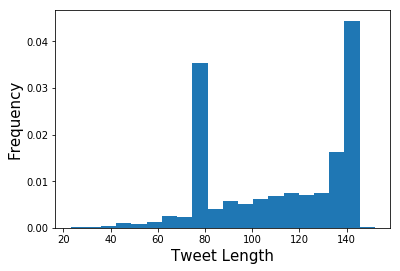

In [2]:
# Some simple Data exploration

N_raw_tweets = len(df)

print('---------------------------------------------------------')
print('Column names: \n', list(df.columns.values),"\n")
print('The number of tweets: ', N_raw_tweets,'\n')
print('---------------------------------------------------------')

# Show the First ten items in the tweet database
print("Sample Tweets: \n")
print(df['tweet_text'][0:100])



# A small data frame to plot the length of the tweets and plot a histogram
df_len= df['tweet_text'].apply(len)
plt.hist(df_len,bins=20,density=True)
plt.ylabel('Frequency',size=15)
plt.xlabel('Tweet Length',size=15)
plt.savefig('tweet_length_histogram_raw.pdf',bboxes='tight')
plt.show()

# Having loaded in the tweets we now process each tweet text and generate a histogram of the length of the processed tweets



The number of tweets after removing duplicates:  2369 

Fraction removed:  0.682


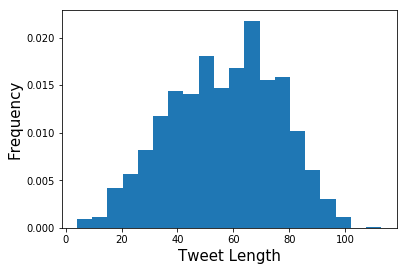

In [3]:
# Apply the 'Clean-up-text function to all tweets in the data frame'
df['tweet_text'] = df['tweet_text'].apply(clean_up_text)


# Remove duplicate tweets and reset the index
df.drop_duplicates(subset='tweet_text', keep='first', inplace=True)
df=df.reset_index(drop=True)

N_processed_tweets = len(df)

print('\n')
print('=============================================================')
print('The number of tweets after removing duplicates: ', N_processed_tweets ,'\n')
print('Fraction removed: ', round(1.0-(N_processed_tweets/float(N_raw_tweets)),3) )
print('=============================================================')

# A small data frame to plot the length of the tweets
df_len= df['tweet_text'].apply(len)
plt.hist(df_len,bins=20,density=True)
plt.ylabel('Frequency',size=15)
plt.xlabel('Tweet Length',size=15)
plt.savefig('tweet_length_histogram_processed.pdf',bboxes='tight')
plt.show()

In [4]:
import warnings
warnings.filterwarnings('ignore')

from process_text import clean_up_text
from process_text import string_cohesion
from textblob import TextBlob
import spacy
import pickle
from sklearn.externals import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

#--------------------------------------------------------------
# Import the custom stop words
custom_stop_words = []
with open( "stopwords.txt", "r" ) as fin:
    for line in fin.readlines():
        custom_stop_words.append( line.strip() )
#--------------------------------------------------------------


#--------------------------------------------------------------
# Import the vocabulary and generate the vectorizer tranformer
#--------------------------------------------------------------
(A,terms,dict_sample) = joblib.load( "/home/javier/Documents/sentiment_analysis/sentiment_model/articles-raw.pkl" )
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )
print('number of terms: ',len(terms))#print(dic_sample[0:10])
print('Dictionary: ',len(dict_sample))

vectorizer = TfidfVectorizer(stop_words = custom_stop_words,min_df = 20)
A = vectorizer.fit_transform(dict_sample)
print('A: ', A.shape)
#--------------------------------------------------------------


#--------------------------------------------------------------
# We load the trained models
#--------------------------------------------------------------
# The names of the files containing the weights of the model
filename1 = 'lr_sentiment_model.sav'
filename2 = 'nb_sentiment_model.sav'

# Now we load in the trained models
loaded_lr = pickle.load(open(filename1, 'rb'))
loaded_nb = pickle.load(open(filename2, 'rb'))

Loaded 2442 X 1965 document-term matrix
number of terms:  1965
Dictionary:  6105
A:  (6105, 1965)


In [5]:
# Here we will define the final sentiment model


def sentiment_model(text,threshold):
    
    s = str(clean_up_text(text))
    
    X0 = vectorizer.transform([s])
    
    preds_nb = loaded_nb.predict(X0)
    preds_lr = loaded_lr.predict(X0)
    preds_blob =  TextBlob(text).sentiment.polarity
    
    if(preds_blob>=0.0):
        preds_blob = +1
    else:
        preds_blob = -1
        
    indx_nb= int((preds_nb[0]+1)/2)
    indx_lr= int((preds_lr[0]+1)/2)
    prob_nb = abs((loaded_nb.predict_proba(X0)[0][indx_nb]-.50)*2.0*int(preds_nb[0]))
    prob_lr = abs((loaded_lr.predict_proba(X0)[0][indx_lr]-0.50)*2.0*int(preds_lr[0]))
    prob_blob = abs(TextBlob(sample_text).sentiment.polarity) # [-1,1]
    
    
    if(prob_lr<threshold):
        preds_lr=[0.0]
        
    if(prob_nb<threshold):
        preds_nb=[0.0]
        
    if(prob_blob<threshold):
        preds_blob =0.0
        
        
    # choose the most likely model
    predictions = [preds_nb[0],preds_lr[0],preds_blob]
    predict_prob = [prob_nb,prob_lr,prob_blob]
    
    pred = predictions[np.argmax(predict_prob)]
    prob = np.max(predict_prob)
    
    
    return pred,prob

100%|██████████| 4/4 [01:05<00:00, 16.47s/it]


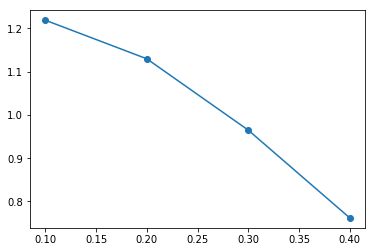

In [6]:
import collections
from tqdm import tqdm

thresholds = [0.1,0.2,0.3,0.4]
sentiment_pred = []
sentiment_prob = []
ratio = []

for threshold in tqdm(thresholds):
    
    sentiment_pred = []
    sentiment_prob = []
    
    for k in range(0,len(df)):
        sample_text = df['tweet_text'][k]
        pred,prob = sentiment_model(sample_text,threshold)
        sentiment_pred.append(pred)
        sentiment_prob.append(prob)
        
    m_count= collections.Counter(sentiment_pred)
    ratio.append(m_count[-1]/m_count[1])
    
plt.plot(thresholds,ratio,"-o")
plt.show()

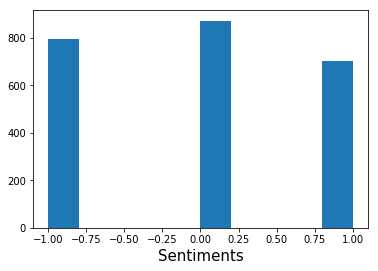

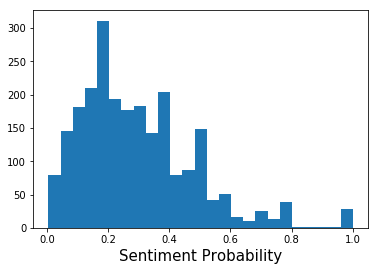

In [7]:
threshold = 0.2


sentiment_pred = []
sentiment_prob = []
    
for k in range(0,len(df)):
    sample_text = df['tweet_text'][k]
    pred,prob = sentiment_model(sample_text,threshold)
    sentiment_pred.append(pred)
    sentiment_prob.append(prob)

plt.hist(sentiment_pred)
plt.xlabel("Sentiments",size=15)
plt.show()


plt.hist(sentiment_prob,bins=25)
plt.xlabel("Sentiment Probability",size=15)
plt.show()

# Having selected the appropriate threshold for neutral comments, we compute the total number of positive and negative tweets

Neg/Pos ratio:  1.1294452347083925


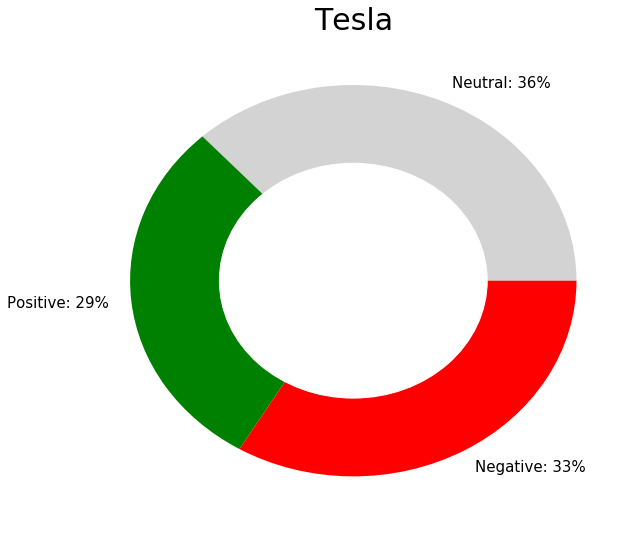

In [8]:
import matplotlib.pyplot as plt
import collections, numpy

matplotlib.rcParams['figure.figsize'] = 10, 9
matplotlib.rcParams['font.size'] = 15

# Count the various sentiments
m_count= collections.Counter(sentiment_pred)

size_model=[m_count[0],m_count[1],m_count[-1]]

# Compute the total numbers
total_number = np.sum(size_model)

# Compute the Percentages
percents = (np.asarray([m_count[0],m_count[1],m_count[-1]])/total_number)*100.0

print("Neg/Pos ratio: ", m_count[-1]/m_count[1])
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.6, color='white')


# create data
names='Neutral: '+str(int(percents[0]))+"%",'Positive: '+str(int(percents[1]))+"%", 'Negative: '+str(int(percents[2]))+"%"

# Give color names
plt.title(car_company,size=30)
plt.pie(size_model, labels=names, colors=['lightgrey','green','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig(car_company+".pdf",bboxes="tight")
plt.show()